# Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [1]:
#!pip install seaborn
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
df=pd.read_csv("fcc-forum-pageviews.csv")
df=df.set_index('date')
df=df[df['value']>=df['value'].quantile(0.025)]
df=df[df['value']<=df['value'].quantile(0.975)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Draw Line Plot

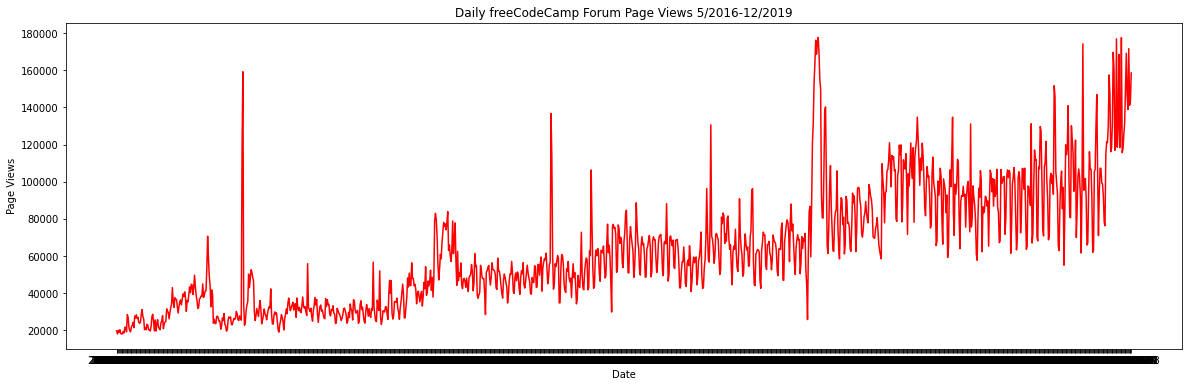

In [3]:
fig, ax = plt.subplots(1,1,figsize=(20,6))
plt.plot(df.index.values,df.value,'r')
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.show()


Copy and modify data for monthly bar plot

In [4]:
df['year'] = pd.DatetimeIndex(df.index.values).year
#df['month'] = pd.DatetimeIndex(df.index.values).month_name()
df['month'] = pd.DatetimeIndex(df.index.values).month_name()
#df = df.set_index(df.month.strftime('%b'))
#df.groupby(['year','month'])['value'].mean()
df['month_short']= df['month'].astype(str).str[0:3]
df

,value,year,month,month_short
date,,,,
2016-05-19,19736,2016,May,May
2016-05-26,18060,2016,May,May
2016-05-27,19997,2016,May,May
2016-05-28,19044,2016,May,May
2016-05-29,20325,2016,May,May
...,...,...,...,...
2019-11-24,138875,2019,November,Nov
2019-11-29,171584,2019,November,Nov
2019-11-30,141161,2019,November,Nov


### Draw Bar Plot

Text(0, 0.5, 'Average Page Views')

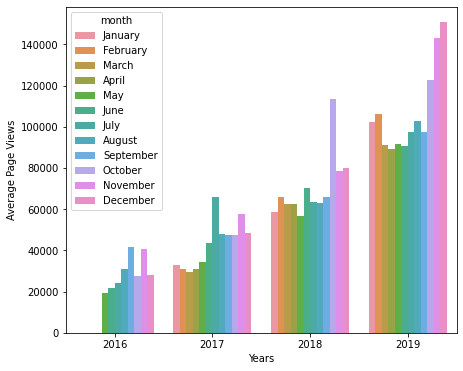

In [5]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x='year', y='value', hue='month', data=df,ci=None,hue_order=Months)
plt.xlabel("Years")
plt.ylabel("Average Page Views")

Creating a copy of df

In [6]:
df_box=df.copy()

In [7]:
df_box['year'] = pd.DatetimeIndex(df_box.index.values).year
df_box['month'] = pd.DatetimeIndex(df_box.index.values).month_name()
df_box['month_short']= df_box['month'].astype(str).str[0:3]

### Draw box plot

Text(0, 0.5, 'Page Views')

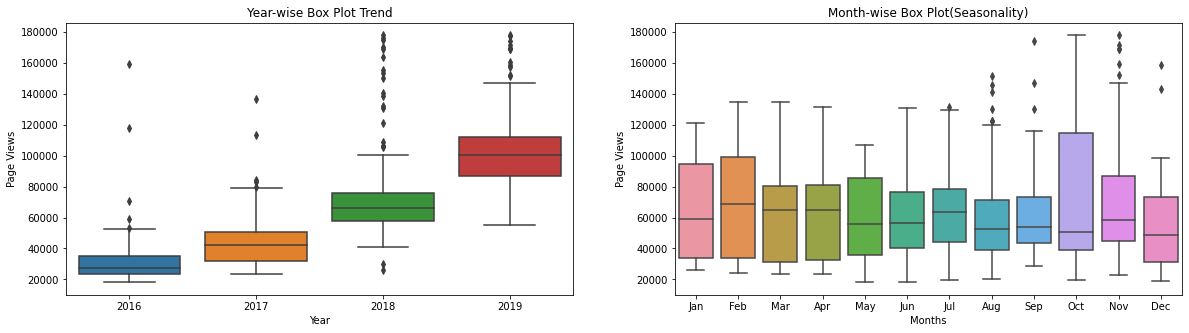

In [8]:
Months_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(1, 2,figsize=(20,5))
sns.boxplot(ax=ax[0],x=df_box.year,y=df_box.value)
ax[0].set_title("Year-wise Box Plot Trend")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Page Views")
sns.boxplot(ax=ax[1],x=df_box.month_short,y=df_box.value,order=Months_short)
ax[1].set_title("Month-wise Box Plot(Seasonality)")
ax[1].set_xlabel("Months")
ax[1].set_ylabel("Page Views")